- Bagging vs boosting
- Stumps and adaboost
- Gradient boosting for classification
- Gradient boosting for regression
- Implementations of gradient boosting

## Boosting, Adaptative Boosting, Gradient Boosting

![](https://images.unsplash.com/photo-1508796079212-a4b83cbf734d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Photo by [César Couto](https://unsplash.com/photos/hNZ6WOOnQpk)

Today's lesson is about Gradient Boosting, a powerful Machine Learning algorithm. Like Random Forest, it can be used either for regression or classification! We will start off with a gentle reminder on Decision Trees and Bagging techniques, before moving on to Adaptative Boosting, Gradient Boosting and XGBoost/LGMB/Catboost.

# I. Reminder : Decision Trees and Random Forests

## I.1 Decision Trees

Reminder that in a Decision Tree, we perform binary classifications and can grow the depth of a tree to make the resulting decision frontier more complex.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1GxvuU-RU8afLzYZc2eegZnRtyUzoL4AF">
</p>

To build the tree, we choose each time the feature that splits our data the best way possible. How do we measure the qualitiy of a split ?
- crossed-entropy
- Gini impurity
- classification error

Note that in order to grow a decision tree for numeric data, we usually order the data by value of each feature, compute the average between every successive pair of values, and compute the split quality measure (e.g Gini) using this average.

We stop the development of the tree when splitting a node does not lower the impurity.

Recall that the Gini impurity can be defined as follows. Let $p_{i}$ be the fraction of items labeled with class i in the set :
$$ I_G = 1 - \sum_{i = 1...J} {p_i}^2 $$

## I.2 Random Forest

In Random Forests, we build forests of Decision Trees in several key steps :

**Step 1** : Boostrap Sampling

Pick *n* data points randomly. We are allowed to pick the same point more than 1 time for each bootstrap sample. We will build several bootstrap samples, say K.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Cmh0STP2ZmfEnfe-BXuMLOjFgTeUKZDu">
</p>

**Step 2** : Decision Tree

Then, we build a desicison tree for each bootstrap sample, and use only a subset of the variables each time.  This builds a wide variety of trees.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=10bRgs3x9O4CoGXhQ0r_teSGzXPq15-2C">
</p>

**Step 3** : Majority Vote

Finally, in prediction, we get a new sample, run it through all the decision trees, and apply a majority vote on the output of each tree.

We first **bootstraped** the data, and then **aggregated** the results. This is called Bagging, and stands for Bootstrap Aggregating.

# II. The limits of Bagging

## II.1 Same region, same mistake

For what comes next, consider a binary classification problem. We are either classifying an observation as 0 or as 1. This is not the purpose of the lesson, but for the sake of clarity, let’s recall the concept of bagging.

Bagging is a technique that stands for “Bootstrap Aggregating”. The essence is to select T bootstrap samples, fit a classifier on each of these samples, and train the models in parallel. Typically, in a Random Forest, decision trees are trained in parallel. The results of all classifiers are then averaged into a bagging classifier (i.e. we select the majority vote).

$$ H_T(x) = sign(1/T \sum_t {h_t(x)}) $$

This process can be illustrated the following way. Let’s consider 3 classifiers which produce a classification result and can be either right or wrong. If we plot the results of the 3 classifiers, there are regions in which the classifiers will be wrong. These regions are represented in red.



<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1iF2nzHrwnMTXw7IDOh-l_UHvC80aF9jK">
</p>

This example works perfectly, since when one classifier is wrong, the two others are correct. By voting classifier, you achieve a great accuracy ! But as you might guess, there’s also cases in which Bagging does not work properly, when all classifiers are mistaken in the same region.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1AXptTl3qP2HmaScqFpkXXME_V0dutUP9">
</p>

For this reason, the intuition behind the discovery of Boosting was the following :

- instead of training parallel models, one needs to **train models sequentially**
- and **each model should focus on where the previous classifier performed poorly**

## II.2 Same voting power

You might guess from above that one of the issues of Bagging is essentially that each tree has the same voting power, i.e we take the majority vote without giving more weight to the trees that usually perform better. 

# III. Adaptative Boosting : AdaBoost

## III.1 AdaBoost vs. Random Forests

There are some key changes between AdaBoost and Random Forests :
- The decision trees have now a limited depth. They will be called **stumps**, and must lead to a simple binary classification :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1VwcO6eE83eHLzDIDGy8ncdLqUrny2Gq2">
</p>

- the stumps are called weak learners. Weak learners are algorithms whose error rate is slightly under 50% as illustrated below :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=17UvX3obE1yj47eAdkZzrZaw7uw_6uLVu">
</p>

- the forest of stumps allows for different weights on each stump 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1hka_fKK0fEA1VyWIfsiTmdmtp3a8kLRB">
</p>

- the individual trees are no longer independent. The error of the first stump will influence the way we build the second stump

## III.2 How does it work ?

Boosting trains a series of low performing algorithms (weak learners) by adjusting the error metric over time. 

Suppose that we have 2 features $x_1$ and $x_2$ and we want to predict $y$.

**Step 1** : Initialize the weight given to each observation

When we start our AdaBoost algorithm, we should assign a weight $\frac {1}{n}$ to each of the $n$ observations.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1ECDQCid0Qj_3IPwuXU5h193Yf2dhynH5">
</p>

**Step 2** : Find the best stump

Once we initialized our weight, our aim will be to find the best stump, i.e the variable to use and the threshold to use, that minimizes the Gini index. For example, here, we would typically observe something along the $x_1$ variable.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1otRVrfmOubEzB4N5NRzmQl1NASJHGWtq">
</p>

**Step 3** : Assign a weight to the stump

Remember that each stump has a different weight in the final vote. For this reason, we must now determine what weight to apply to the stump we just built. 

The weight will depend on the classification performance of each stump. Indeed, here, we classified incorrectly 1 observation on 12 overall. 

First, we need to compute the total error. The weight of the observation that was not well classified is ${\epsilon_{t}} = \frac {1}{12}$, which is the total error. If we had 2 wrong classified data, the total error would be ${\epsilon_{t}} = \frac {2}{12}$.

Then, we compute the "amount of say", i.e the weight of the stump on the final vote :

  
$$ \alpha_t = \frac {1} {2} ln \frac {1-\epsilon_{t}} {\epsilon_{t}} $$

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1V2Bo7c6M2rUEs0-6khO452X7gqFrNlcy">
</p>

If the stump is not better than a coin and predicts the good classification in 1 case out of 2, its amount of say is 0. Else, if the total error is low, the amount of say is large. A large total error can lead to a negative amount of say.

**Step 4** : Modify the weights of incorrectly classified samples

Now, we need to *modify the weights of the observations that were not well classified* in order for the next stump to take into account the error of the previous stump. How do we do this ?

We increase the weight of the incorrectly classified sample

$$ w_{t+1}(i) = w_{t}(i) e^{\alpha_t } $$
    
What does this mean ? The new weight is the previous weight * $e^{\text{(amount of say)}}$

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1cYmpoHcW771OwP7WqQDv1PpCdhn1nDae">
</p>

If the amount of say of the previous classifier is large, so the classifier was performing well, then the new weight of the observation will also be really large. We can interpret it the following way. If the classifier was overall good, but misclassified one observation, we'll add much more weight to this observation for the next stump.

**Step 5** : Modify the weights of correctly classified samples

Now, we need to *modify the weights of the observations that were correctly classified*. This is done by adding a minus sign in front of the Amounf of Say in the equation.

$$ w_{t+1}(i) = { w_{t}(i) } e ^{ - \alpha_t } $$


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1jcghhM5RXLevq2zQCy-SO5K0odmrqiLh">
</p>

What this means is that if the classifier was good and had a large amount of say, we will reduce the weight of the observations that were well classified. If the amount of say was small, the new sample weight will be just a little smaller than the previous one, i.e we don't attach too much credibility to the job the previous stump did.

**Step 6** : Normalize the weights

The problem is that the weights of the observations do not sum to 1. We simply need to normalize the weights the following way :

$$ w_{t+1}(i) = \frac {w_{t+1}(i)} {\sum_{w_{t+1}}} = \frac {w_{t+1}(i)} {Z} $$


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1TQmipTp6cpMk2e1n-1HkT4GwrqstPO3W">
</p>

**Step 7** : Rebalance the observations

Using the updated observation weights, we are ready to move to fit the next stump ! There are 2 ways to deal with the new unbalanced weights :
- apply Weighted Gini Index for example
- or create duplicates of the observations by considering the weights as a distribution

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1-GmuTb_gbkl2aUr8aX00n9EPBqSG4h0S">
</p>

We compute the cumulative sum of the weights, pick randomly a number between 0 and 1, and select the corresponding observation. We do this until the new collection is the same size as the original.

**Step 8** : Compute the new stump

The new stump will then be paying much more attention to the way it classifies the large weight observations.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1X_R3IQjypKHJ3VgnBFSZ947mLdBvJrLh">
</p>

**Step 9** : Build a forest of stumps...

Iterate this process until the pre-defined `n_iter` has been reached.

**Step 10** : Make classification with the forest of stumps

Alright, we do now have a forest of stumps. How can we use this to make classification ?

Well, we'll simply look at the amount of say of each stump :
- we sum the amount of say of the stumps that classify the new observation as 1
- we then sum the amount of say of the stumps that classify the new observation as 0

And attribute the class that has the largest summed amount of say.

$$ H(x) = sign(\alpha^1 h^1(x) + \alpha^2 h^2(x) + ... + \alpha^T h^T(x)) $$

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1FBuu8-rJifE3ubbYGQRFte64nvpA4C0N">
</p>

In summary :

- Train the stump on the observations → $h_1$
- Train the stump with exagerated data on the regions in which $h_1$ performs poorly → $h_2$
- Train the stump with exagerated data on the regions in which $h_1$ ≠ $h_2$ → $h_3$
- ...

Instead of training the models in **parallel**, we can train them **sequentially**. This is the essence of Boosting ! Boosting is also an ensemble technique.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1zxEJ_AoRCV_lwvLitK0stNSsnJa5ko7_">
</p>

### III.3 Pseudo-Code

Let's wrap up in a small pseudo-code what we covered so far.

*Step 1* : Let $w_{t}(i) = \frac {1} {N}$ where $N$ denotes the number of training samples, and let $T$ be the chosen number of iterations.

*Step 2* : For $t$ in $T$ :

  a. Pick $h^t$ the weak classifier that minimizes $\epsilon_{t}$ , here we implement a weighted error metric :
  
  $$ \epsilon_{t} = \sum _{i=1}^{m} w_{t}(i)[y_{i}\neq h(x_{i})] $$

  b. Compute the weight of the stump :
  
  $$ \alpha_t = \frac {1} {2} ln \frac {1-\epsilon_{t}} {\epsilon_{t}} $$
 
 c. Update the weights of the training examples $w_{t+1}^{i}$ :
 
 $$ w_{t+1}(i) = \frac { w_{t}(i) } { Z } e ^{- \alpha^t h^t(x) y(x)} $$
 
 And go back to step a).

*Step 3* : $$ H(x) = sign(\alpha^1 h^1(x) + \alpha^2 h^2(x) + ... + \alpha^T h^T(x)) $$

And we're done ! This algorithm is called **AdaBoost**. This is the most important algorithm one needs to understand in order to fully understand Gradient Boosting we'll introduce.

AdaBoost has for a long time been considered as one of the few algorithms that does not overfit. But lately, it has been proven to overfit at some point, and one should be aware of it. AdaBoost is vastly used in face detection to assess whether there is a face in the video or not. AdaBoost can also be used as a regression algorithm.

Adaboost can be generalized to regression by simply taking the average output among the forest of stumps.

# IV. Gradient Boosting

Gradient Boosting is a widely used boosting algorithm. The approach for classification and regression are quite different, so we'll first focus on regression, and then move to classification !

## IV.1 Regression

Gradient Boosting can be compared to AdaBoost, but has a few differences : 
- instead of growing a forest of stumps, we initally predict the average (since it's regression here) of the $y$ column, and build a decision trees based on that value. 
- Like in AdaBoost, the next tree depends on the error of the previous one. 
- But unlike AdaBoost, the tree we grow is not only a stump, but a real decision tree.
- As in AdaBoost, there is a weight associated to the trees, but the scale factor is applied to all the trees.

Alright, so far it might still seem confusion. Let's get to the details of the implementation of the Gradient Boosting regression algorithm :

Let's consider a simple scenario in which we have several features, $x_1, x_2, x_3, x_4$ and try to predict $y$. 

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1UucmHUYXNF7XXFMNUPKjM2M1l7szpqk4">
</p>

**Step 1** : Make a first guess

The initial guess of the Gradient Boosting algorithm is to *predict the average value of the target $y$*. For example, if our features are the age $x_1$ and the height $x_2$ of a person... and we want to predict the weight of the person.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=16kStz18ajYteP_HcrE2y_aWczU7q1stj">
</p>

**Step 2** : Compute the pseudo-residuals

For the variable $x_1$, we compute the difference between the observations and the prediction we made. This is called the pseudo-residuals.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1AQZCBkqatjqv4L8AqZqoPOI-X-KiNLUw">
</p>

We compute the pseudo-residuals with respect to the first feature $x_1$.

**Step 3** : Predict the pseudo-residuals

Then, we will be using the features $x_1, x_2, x_3, x_4$ to predict the pseudo-residuals column.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1FP1HA8ruFu95nKOC9X-bnzeStvpqDBfl">
</p>

We can now predict the pseudo-residuals using a tree, that typically has 8 to 32 leaves (so larger than a stump). By restricting the number of leaves of the tree we build, we obtain less leaves than residuals. Therefore, the outcome of a given branch of the tree is the average of the columns that lead to this leaf, as in a regression tree.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1fGJTtv4s2HEJhuJLam9hXYgv1W1eUr_H">
</p>

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1FK10bM25nwIoNdhgo72DSi4tEsPmfANT" width="800px">
</p>

**Step 4** : Make a prediction and compute the residuals

In order to make a prediction, we say that the average is 13.39. Then, we take our observation, run in through the tree, get the value of the leaf, and add it to 13.39. 

If we stop here, we will most probably overfit. Gradient Boost applies a learning rate $lr$ to scale the contribution from a new tree, by applying a factor between 0 and 1.

$$ y_{pred} = \bar{y_{train}} + lr \times res_{pred} $$

The idea behind the learning rate is to make a small step towards the right direction. This allows an overall lower variance.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Rc3Qm5OWIRslLKay483sR2UFn7TfgZH9">
</p>

Notice how all the residuals got smaller now.

**Step 5** : Make a second prediction

Now, we :
- build a second tree
- compute the prediction using this second tree
- compute the residuals according to the prediction
- build a third tree
- ...


Let's just cover how to compute the prediction. We are still using the features $x_1, x_2, x_3, x_4$ to predict the new residuals Pseudo_Res_2. 

We build a tree to estimate those residuals. Once we have this tree (with a limited number of leaves), we are ready to make the new prediction :

$$ y_{pred} = \bar{y_{train}} + lr \times res_{pred_1} + lr \times res_{pred_2} $$

The prediction is equal to :
- the average value initially computed
- plus LR * the predicted residuals at step 1
- plus LR * the predicted residuals at step 2

Notice how we always apply the same Learning Rate. We are now ready to compute the new residuals, fit a 3rd tree on it, compute the 4th residuals... and so on, until :
- we reach the maximum number of trees specified
- or we don't learn significantly anymore

We are now ready to illustrate the process when there is a single feature :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=16WHn40yNzvoxM1WE-ak-SNZflxl2R5T0">
</p>

### Pseudo-Code :

The algorithm can be then described as the following, on a dataset $(x,y)$ with $x$ the features and $y$ the targets, with a differentiable loss function $\cal{L}$:

$\cal{L} = \frac {1} {2} (Obs - Pred)^2$, called the Squared Residuals. Notice that since the function is differentiable, we have :

$$ \frac { \delta } {\delta Pred} \cal{L} = - 1 \times (Obs - Pred) $$

**Step 1** : Initialize the model with a constant value : $F_0(x) = argmin_{\gamma} \sum_i \cal{L}(y_i, \gamma)$. We simply want to minimize the sum of the squared residuals (SSR) by choosing the best prediction $\gamma$.
    
If we derive the optimal value for  $\gamma$ :

$$ \frac { \delta } {\delta \gamma } \sum_i \cal{L}(y_i, \gamma) = -(y_1 - \gamma) + -(y_2 - \gamma) + -(y_3 - \gamma) + ... = 0 $$

$$ \sum_i y_i - n * \gamma = 0 $$

$$ \gamma = \frac{ \sum_i y_i }{n} = \bar{y} $$

This is simply the average of the observations. This justifies our previous constant initialization. In other words, we created a leaf that predicts all samples will weight the average of the samples.

**Step 2** : For m = 1 to M (the maximum number of trees specified, e.g 100) 

- a) Compute the pseudo-residuals for every sample :
    
    $$ r_{im} = - \frac {\delta \cal{L} (y_i, F(x_i)) } {\delta F(x_i)} = - ( - 1 \times (Obs - F_{m-1}(x)) ) = (Obs - F_{m-1}(x)) = (Obs - Pred) $$
    
This derivative is called the Gradient. The Gradient Boost is named after this.

- b) Fit a regression tree to the $r_{im}$ values and create terminal regions $R_{jm}$ for j = 1, ... , $J_m$, i.e create the leaves of the tree. At that point, we still need to compute the output value of each leaf.

- c) For each leaf j = 1... $J_m$, compute the output value that minimized the SSR : $\gamma_{jm} = argmin_{\gamma} \sum_{x_i \in R_{ij}} \cal{L}(y_i, F_{m-1} + \gamma)$. In other words, we will simply predict the output of all the samples stored in a certain leaf.

- d) Make a new prediction for each sample by updating, accoridng to a learning rate $lr \in (0,1)$ :
$F_m(x) = F_{m-1}(x) + lr \times \sum_j \gamma_{jm} I(x \in R_{jm} )$. We compute the new value by summing the previous prediction and all the predictions $\gamma$ into which our sample falls.

## IV.2 Classification

So far, we covered the Gradient Boost techniques for regression. But how does is word for classification ?

Our dataset might now look something like this :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1Lj_6kV2QCtfI2WySwXIqltS_Jq378E9_">
</p>

In the first step, instead of computing the average of Y, as in logistic regressions, we compute the log of the odds :

$$ odds = log( \frac {P(Y=1)} {P(Y=0)} ) = log( \frac {3} {1} ) = log(3) $$

This is our initial prediction. But how do we compute a probability to belong to a class or another using this weird ratio ?

We apply a softmax / logistic transformation :

$$ P(Y=1) = \frac {e^{odds}} {1 + e^{odds}} = \frac {3} {4} = 0.75 $$

If this probability is greater than 0.5, we classify as 1. Else, we classify as 0.

We have now predicted a value for every sample, the same value for all of them actually. The next step is to compute the residuals :

- 1-0.75 = 0.25
- 1-0.75 = 0.25
- 1-0.75 = 0.25
- 0-0.75 = -0.75

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1_w0T67OihTb5Dpfa2HoinOOEyJ7zfrGR">
</p>

As previously, we use the features 1 to 3 to predict the residuals. Suppose that we build the classification tree to predict the output value of the tree :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1stVLXnScLG94Xrlvja8ZfystVlcLhklx">
</p>

In that case, we cannot use the output of a leaf (or the average output if we have more observations) as the predicted value, since we applied a transformation initially.

We need to apply another transformation :

$$ \gamma_{i+1} = \frac { \sum_i Residuals_i } { \sum(\gamma_i \times (1-\gamma_i))} $$

For example, take a case in which we have 1 more observation that falls into a leaf :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1nPbIi-mQGzXl-Kw08pZqVzkIBtiQvnAn">
</p>

In that case, the output value of the branch that contains 0.25 and -0.75 is :

$$ \frac {0.25 - 0.75} { 0.75 * (1-0.75) + 0.75*(1-0.75)} = -1.33 $$

We can now compute the new prediction :

$$ y_{pred} = odds + lr \times y_{res} = log(3) + 0.1 * -1.33 = 0.9656 $$

We can now convert the new log odds prediction into a probability using the softmax function :

$$ P(Y=1) = \frac {e^{0.9656}} {1 + e^{0.9656}} = 0.7242 $$

The probability dimishes compared to before, since we had 1 well classified and 1 uncorrectly classified sample in this leaf.

Now, every sample has its own predicted probability. So, we restart the whole process by computing the residuals from this predicted value. The rest is really similar to the regression case.

According to the final probability we get, we will classify either 0 or 1.

Since the development of Gradient Boosting techniques, there has been several major initiatives in the world of Gradient Boosting :
- Extrement Gradient Boost
- Light Gradient Boosting Model
- Cat Boost

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1XKdG62SAMVLPNeR3usTcyRfgvlWDtYUa">
</p>

# V. XGBoost

XGBoost stands for Extreme Gradient Boosting and is one of the *fastest implementations* of Gradient Boosted Trees. It is written in C++ and offers many useful wrappers in higher-level languages.

Instead of considering the potential loss for all possible splits to create a new branch, it looks at the distribution of features across all data points in a leaf and uses this information to reduce the search space of possible feature splits.

The way the best features are identified implies 2 main concepts :
- Pre-sorting algorithm
- Histogram-based algorithm

First let's understand how pre-sorting splitting works :
- For each node, enumerate over all features
- For each feature, sort the instances by feature value
- Use a linear scan to decide the best split along that feature basis information gain
- Take the best split solution along all the features

This might still be long to compute, so XGBoost uses the concept of Histogram-based split, which splits all the data points for a feature into discrete bins and uses these bins to find the split value of histogram.
   

Keep in mind the XGBoost grows the trees "level-wise" due to the splitting methods detailed above :

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1l-WZRgA8YjqknnoQiwCfS5_6c58RvEWs">
</p>

# VI. LGBM

LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the samples for finding a split value.

Gradient-based One-Side Sampling keeps all the instances with large gradients and performs random sampling on the instances with small gradients. For example, let’s say we have 500K rows of data where 10k rows have higher gradients. So the algorithm will choose (10k rows of higher gradient+ x% of remaining 490k rows chosen randomly).

A leaf with higher gradient/error is used for growing further. This is what we call a leaf-wise growth.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1_M0F5XOUSSvbhypERNGovZqiX_JJnPsx">
</p>

LightGBM has the huge advantage to be parallelized: it means it can be optimized on multiple processors and then decrease largely the computing time. But on the other hand, LightGBM is really sensitive to overfitting. This is an algorithm that performs poorly on small datasets.

This is then well suited for large datasets (at least 10000 samples), when overfitting is less likely and high speed is needed.

More information can be found in the original documentation if you ever need to use it: https://lightgbm.readthedocs.io/en/latest/


# VII. CatBoost

CatBoost is a fast, scalable, high performance open-source gradient boosting on decision trees library developed by Yandex. The main features of CatBoost are the following :
- Categorical features support (even text categories)
- Fast and scalable GPU version
- User-friendly APIs...

If you'd like to know more : https://catboost.ai/

# VIII. Applications

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

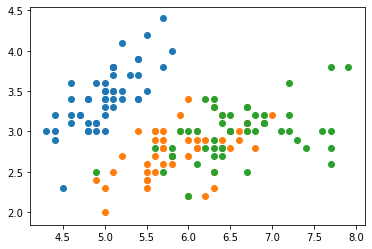

In [2]:
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

plt.scatter(X[y==0,0], X[y==0, 1])
plt.scatter(X[y==1,0], X[y==1, 1])
plt.scatter(X[y==2,0], X[y==2, 1])
plt.show();

In [3]:
def plot_figure(model) : 
    # Make a decision boundary plot
    # Create figure to draw chart
    plt.figure(2, figsize=(10, 8))

    # We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size of the grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        
    # Retrieve predictions for each point of the grid
    Z_GBC = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_GBC = Z_GBC.reshape(xx.shape)

    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx, yy, Z_GBC, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Format chart
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.show()

## VIII.0 Decision Tree

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [5]:
%%time
# Fit on the data
dt.fit(X,y)

CPU times: user 2.33 ms, sys: 361 µs, total: 2.69 ms
Wall time: 1.65 ms


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

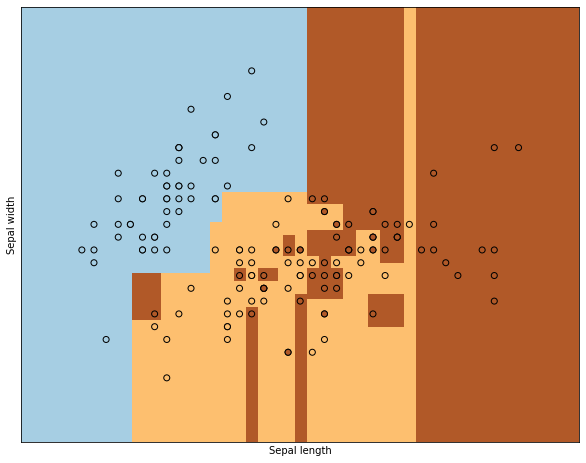

In [6]:
# Plot the figure
plot_figure(dt)

In [7]:
dt.score(X, y)

0.9266666666666666

## VIII.1 AdaBoost

First here is how to perform AdaBoost using scikit-learn. We will make a pedagogical example to go through the algorithm mechanisms.

In [8]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100)

In [9]:
%%time
# Fit on the data
ada.fit(X,y)

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 135 ms


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

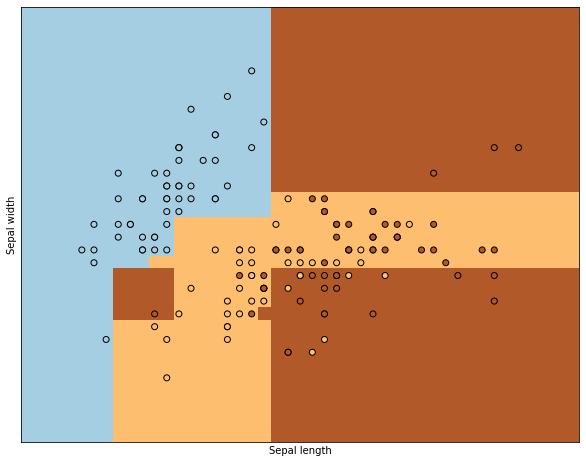

In [10]:
# Plot the figure
plot_figure(ada)

## VIII.2 Gradient Boosting

In [20]:
# Import the library
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the object
GBC = GradientBoostingClassifier(n_estimators=10, max_depth=2)

In [21]:
%%time
# Fit on the data
GBC.fit(X,y)

CPU times: user 23.7 ms, sys: 4.29 ms, total: 28 ms
Wall time: 25.6 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

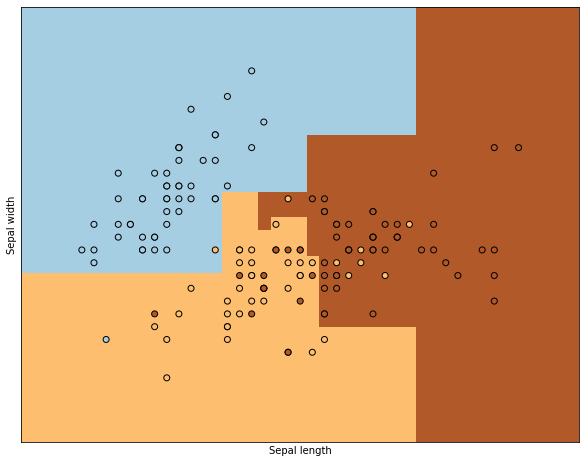

In [22]:
# Plot the figure
plot_figure(GBC)

As you can see, Gradient Boosting may overfit. The following parameters can be used to reduce variance:
* *subsample*: percentage of samples used per tree, by setting it lower than 1 may reduce variance and add bias
* *max_features*: the max number of features to use per split, by setting it to a smaller value it subsamples the features and helps reduce variance
* *n_iter_no_change*: early stopping, it stops the algorithm after the given number of iteration without change to the loss function

Let's try on the same example:

In [23]:
# Instantiate the object
GBC = GradientBoostingClassifier(n_iter_no_change=2) #max_features=1)

In [24]:
%%time
# Fit on the data
GBC.fit(X,y)

CPU times: user 65 ms, sys: 0 ns, total: 65 ms
Wall time: 64.1 ms


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=2, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

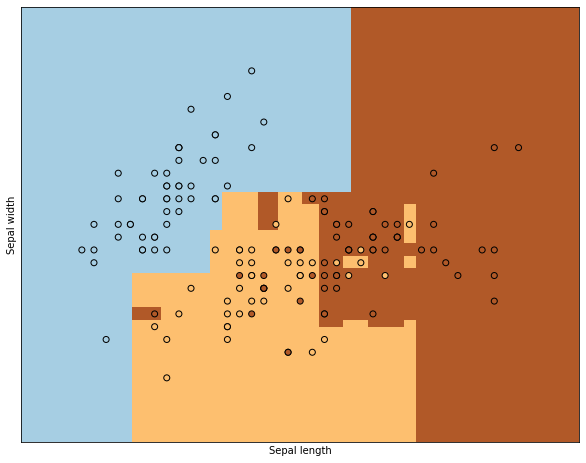

In [25]:
# Plot the figure
plot_figure(GBC)

## VIII.3 XGBoost

To install it, just type in your terminal:

`pip install xgboost`

Let's show how to use it on our classification example:

In [29]:
# Import the library
import xgboost as xgb

# Instantiate the object
xg = xgb.XGBClassifier()

In [30]:
%%time
# Fit on the data
xg.fit(X,y)

CPU times: user 26.7 ms, sys: 81 µs, total: 26.8 ms
Wall time: 25.1 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

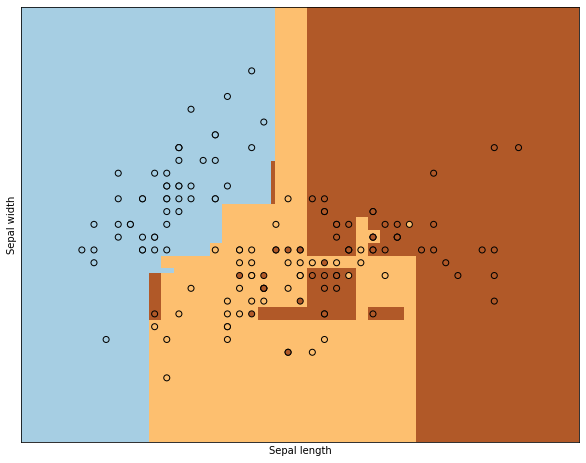

In [31]:
# Plot the figure
plot_figure(xg)

The following parameters can be fine tuned in order to improve the efficiency of the algorithm:
* subsample: percentage of samples used per tree, a low value can reduce variance and increase bias
* colsample_bytree: percentage of features used per tree, a high value can increase variance
* n_estimators: number of trees you want to build
* alpha: L1 regularization on leaf weights, a large value leads to more regularization
* lambda: L2 regularization on leaf weights, smoother than L1 regularization

Let's try out:

In [32]:
# Instantiate the object
xg = xgb.XGBClassifier(subsample=0.8,reg_lambda=10)

In [33]:
%%time

# Fit on the data
xg.fit(X,y)

CPU times: user 27.7 ms, sys: 0 ns, total: 27.7 ms
Wall time: 26.6 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

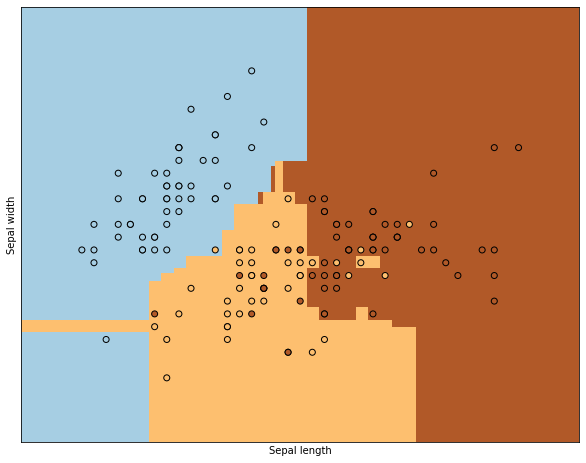

In [21]:
# Plot the figure
plot_figure(xg)

Of course, an hyperparameter random or grid search is necessary to optimize properly the hyperparameters!

## VIII.4 LightGBM

To install it, run :

`pip install lightgbm`

In [34]:
import lightgbm as lgb

lg = lgb.LGBMClassifier(silent=False)

In [35]:
%%time
lg.fit(X,y)

CPU times: user 28.8 ms, sys: 0 ns, total: 28.8 ms
Wall time: 41.2 ms


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

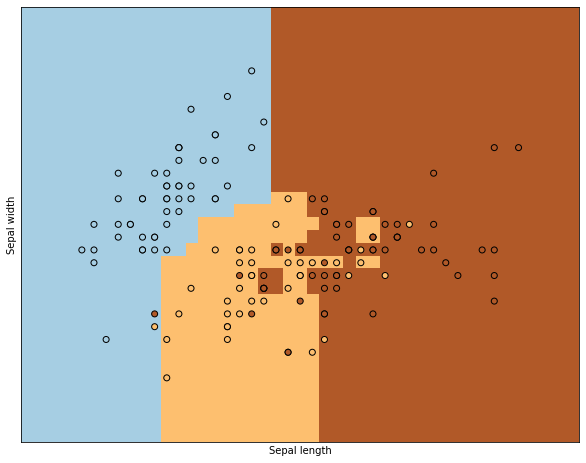

In [36]:
# Plot the figure
plot_figure(lg)

## VIII.4 CatBoost

To install catboost :
    
`pip install catboost`

In [38]:
import catboost as cb

cb = cb.CatBoostClassifier(iterations=20, loss_function='MultiClass')

In [39]:
%%time
cb.fit(X,y)

0:	learn: 1.0783315	total: 48.7ms	remaining: 924ms
1:	learn: 1.0600054	total: 50.7ms	remaining: 456ms
2:	learn: 1.0419733	total: 51.2ms	remaining: 290ms
3:	learn: 1.0237406	total: 52.7ms	remaining: 211ms
4:	learn: 1.0060854	total: 61.7ms	remaining: 185ms
5:	learn: 0.9880642	total: 62.4ms	remaining: 146ms
6:	learn: 0.9705925	total: 63ms	remaining: 117ms
7:	learn: 0.9540200	total: 64.1ms	remaining: 96.2ms
8:	learn: 0.9389742	total: 65.1ms	remaining: 79.5ms
9:	learn: 0.9237246	total: 66.4ms	remaining: 66.4ms
10:	learn: 0.9105866	total: 68.8ms	remaining: 56.3ms
11:	learn: 0.8958291	total: 69.5ms	remaining: 46.3ms
12:	learn: 0.8820254	total: 70.1ms	remaining: 37.7ms
13:	learn: 0.8695045	total: 70.6ms	remaining: 30.3ms
14:	learn: 0.8575453	total: 71.7ms	remaining: 23.9ms
15:	learn: 0.8460796	total: 73.7ms	remaining: 18.4ms
16:	learn: 0.8351274	total: 74.2ms	remaining: 13.1ms
17:	learn: 0.8239845	total: 74.8ms	remaining: 8.31ms
18:	learn: 0.8137926	total: 75.4ms	remaining: 3.97ms
19:	learn: 0

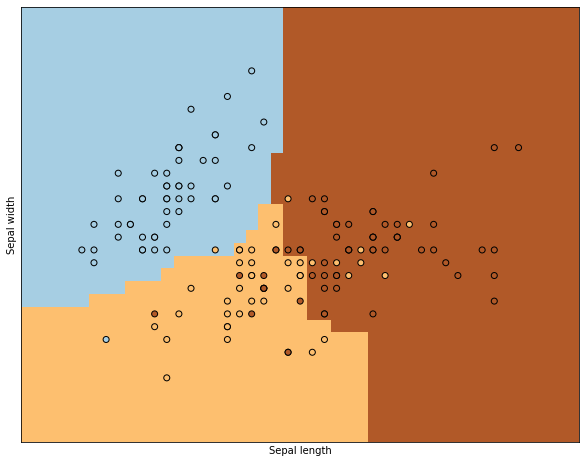

In [40]:
# Plot the figure
plot_figure(cb)

# IX. Summary

*Random Forest :*
- is a Bagging algorithm
- that makes a forest of decision trees
- gives the same weight to each decision tree
- grows trees independently

*Adaboost :*
- is a Boosting algorithm
- combines weak learners (most often stumps)
- gives a different weight to each stump depending on their performance
- each stump depends on the mistakes of the previous ones

*Gradient Boosting Regression :*
- is a Boosting algorithm
- combines trees
- computes the residuals of the previous step
- attaches a learning rate to each model

*Gradient Boosting Classification :*
- same as regression
- applies as transformation to allow for classification

*XGBoost :*
- super fast implementation
- Histogram-based split to build trees

*LGBM :*
- developed by Microsoft
- leaf-wise development depending of gradient

*Catboost :*
- developed by Yandex
- supports categorical features
- supports GPU natively